### 1. 전복데이터를 이용해 머신러닝 분류하기

In [1]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('abalone.csv')

# 데이터 확인
print(data.head())


   id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0   M   0.455     0.365   0.095        0.5140          0.2245   
1   1   M   0.350     0.265   0.090        0.2255          0.0995   
2   2   F   0.530     0.420   0.135        0.6770          0.2565   
3   3   M   0.440     0.365   0.125        0.5160          0.2155   
4   4   I   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


### -> 데이터를 확인한 결과 Sex에 F,M,I의 문자가 들어가 있다. 이로 인한 오류를 방지하기 위해 원핫인코딩하겠다.

In [2]:
#이거는 matplotlib 글씨가 깨져서 시도함

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 글꼴 경로 설정 (굴림)
font_path = 'C:/Windows/Fonts/gulim.ttc'  # 글꼴 파일 경로
font_prop = fm.FontProperties(fname=font_path, size=12)

# Matplotlib 설정
plt.rc('font', family=font_prop.get_name())
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시


정확도: 0.27


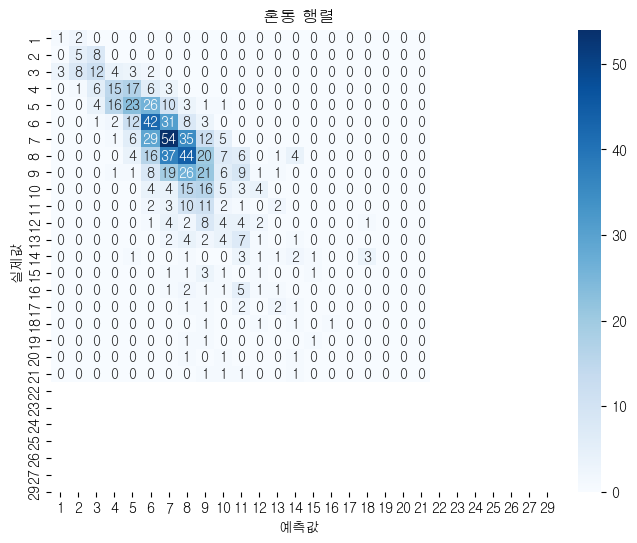

              precision    recall  f1-score   support

           3       0.25      0.33      0.29         3
           4       0.31      0.38      0.34        13
           5       0.39      0.38      0.38        32
           6       0.38      0.31      0.34        48
           7       0.34      0.27      0.30        84
           8       0.31      0.42      0.36        99
           9       0.32      0.38      0.35       142
          10       0.29      0.32      0.30       139
          11       0.21      0.23      0.22        93
          12       0.13      0.10      0.11        51
          13       0.02      0.03      0.03        31
          14       0.17      0.08      0.11        26
          15       0.00      0.00      0.00        21
          16       0.18      0.15      0.17        13
          17       0.33      0.12      0.18         8
          18       0.00      0.00      0.00        12
          19       0.00      0.00      0.00         7
          20       0.00    

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv('abalone.csv')

# 성별을 원-핫 인코딩
X = pd.get_dummies(data.drop('Rings', axis=1), columns=['Sex'], drop_first=True)

# 레이블 분리 (Rings를 그대로 사용)
y = data['Rings']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 생성 및 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'정확도: {accuracy:.2f}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.ylabel('실제값')
plt.xlabel('예측값')
plt.title('혼동 행렬')
plt.show()

# 분류 보고서
print(classification_report(y_test, y_pred, zero_division=0)) #모델이 특정 클래스(Rings의 특정 값)를 전혀 예측하지 못해서 정밀도(Precision)를 계산할 수 없어서 zero_division=0 추가


## 2. 전복데이터를 이용해 머신러닝 회귀

   id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0   M   0.455     0.365   0.095        0.5140          0.2245   
1   1   M   0.350     0.265   0.090        0.2255          0.0995   
2   2   F   0.530     0.420   0.135        0.6770          0.2565   
3   3   M   0.440     0.365   0.125        0.5160          0.2155   
4   4   I   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  
Mean Squared Error: 3.842545454545455
R^2 Score: 0.6450373306038202


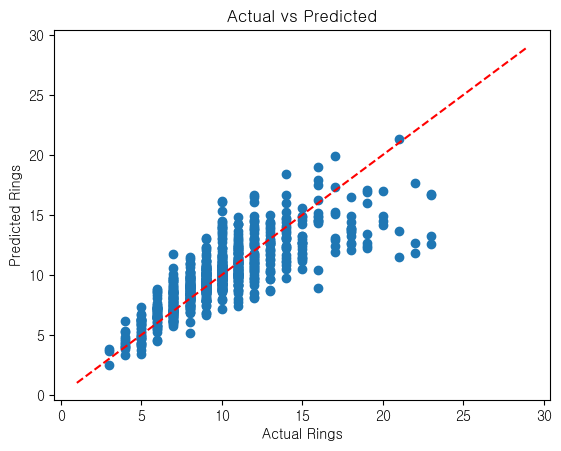

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# 데이터 불러오기
data = pd.read_csv('abalone.csv')

# 데이터 확인
print(data.head())

# 원-핫 인코딩
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# 특성과 레이블 정의
X = data.drop('Rings', axis=1)
y = data['Rings']

# 훈련세트와 테스트세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 결과 시각화
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # 대각선
plt.show()


## 3. 전복 데이터를 가지고 신경망 분류를 수행하라

#### 우선 전복데이터를 대 중 소로 분류하기 위해 데이터 확인을 하겠음

In [5]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('abalone.csv')

# Rings 열의 최고값과 최저값 확인
max_rings = data['Rings'].max()
min_rings = data['Rings'].min()

print(f'Rings 최고값: {max_rings}')
print(f'Rings 최저값: {min_rings}')

Rings 최고값: 29
Rings 최저값: 1


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# 데이터 로드
data = pd.read_csv('abalone.csv')

# 'sex' 열을 원-핫 인코딩으로 변환
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# Rings 값을 범주형으로 변환 (예: 0-8: 'low', 9-12: 'medium', 13-29: 'high')
bins = [0, 8, 12, 29]
labels = ['low', 'medium', 'high']
data['Rings_category'] = pd.cut(data['Rings'], bins=bins, labels=labels)

# 특성과 레이블 설정
X = data.drop(['Rings', 'Rings_category'], axis=1)
y = data['Rings_category']

# 레이블 인코딩
y = pd.get_dummies(y).values  # 원-핫 인코딩

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 신경망 모델 정의
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')  # 출력층: 클래스 수에 맞게
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'평가 손실: {loss}, 정확도: {accuracy}')


Epoch 1/100
84/84 [==============================] - 1s 5ms/step - loss: 0.8328 - accuracy: 0.6340 - val_loss: 0.7459 - val_accuracy: 0.6771
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 0.7269 - accuracy: 0.6789 - val_loss: 0.7008 - val_accuracy: 0.6996
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.7021 - val_loss: 0.6692 - val_accuracy: 0.7190
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.7115 - val_loss: 0.6536 - val_accuracy: 0.7160
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 0.6456 - accuracy: 0.7264 - val_loss: 0.6472 - val_accuracy: 0.7055
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 0.6379 - accuracy: 0.7246 - val_loss: 0.6305 - val_accuracy: 0.7115
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 0.6259 - accuracy: 0.7339 - val_loss: 0.6302 - val_accuracy: 0.7115
Epoch 8/100
8

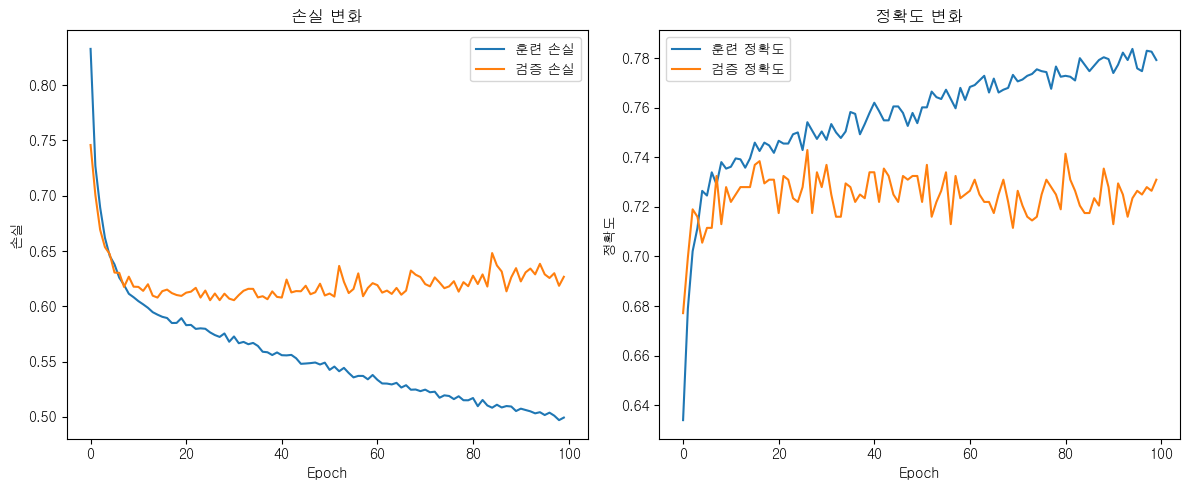

In [7]:
# 시각화

import matplotlib.pyplot as plt

# 손실 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('손실 변화')
plt.xlabel('Epoch')
plt.ylabel('손실')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='훈련 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.title('정확도 변화')
plt.xlabel('Epoch')
plt.ylabel('정확도')
plt.legend()

plt.tight_layout()
plt.show()


## 4. 전복 데이터를 가지고 신경망 회귀를 수행하라

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# 데이터 로드
data = pd.read_csv('abalone.csv')

# 'sex' 열을 원-핫 인코딩으로 변환
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)

# Rings 레이블 타겟으로 설정
X = data.drop('Rings', axis=1)
y = data['Rings']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 신경망 모델 정의
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # 회귀 문제이므로 출력층은 1개
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 모델 평가
loss, mae = model.evaluate(X_test, y_test)
print(f'평가 손실: {loss}, 평균 절대 오차: {mae}')

Epoch 1/100
84/84 [==============================] - 1s 4ms/step - loss: 64.8111 - mae: 7.1002 - val_loss: 25.8259 - val_mae: 4.0700
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 19.1272 - mae: 3.2733 - val_loss: 10.4897 - val_mae: 2.3538
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 9.4865 - mae: 1.9775 - val_loss: 5.9775 - val_mae: 1.7902
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 7.1773 - mae: 1.7471 - val_loss: 5.1268 - val_mae: 1.6630
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 6.3531 - mae: 1.6812 - val_loss: 4.6579 - val_mae: 1.5644
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 5.8140 - mae: 1.6436 - val_loss: 4.4512 - val_mae: 1.4986
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 5.5067 - mae: 1.6133 - val_loss: 4.4286 - val_mae: 1.5313
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 5.2531

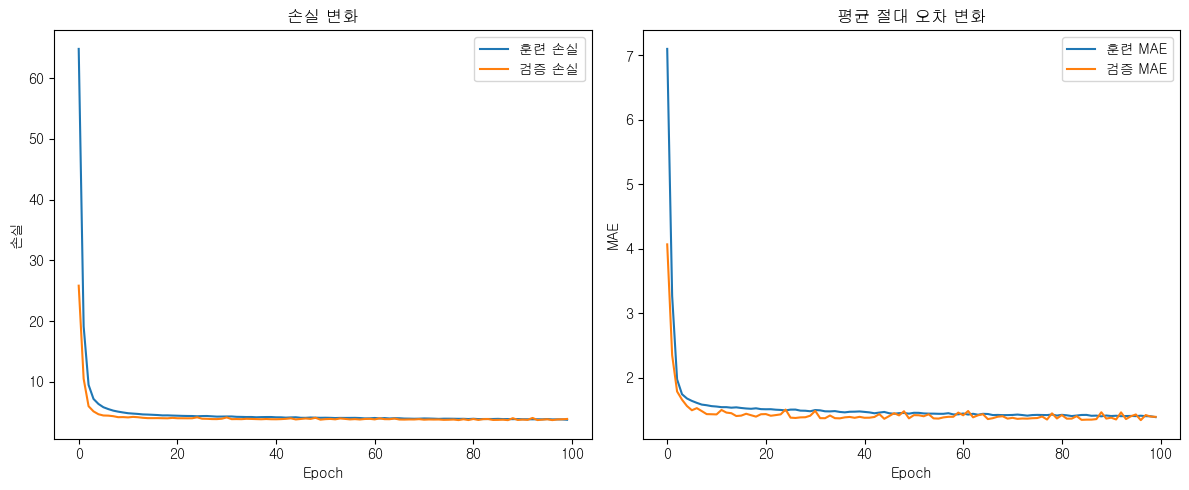

In [9]:
# 시각화
import matplotlib.pyplot as plt

# 손실 및 MAE 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('손실 변화')
plt.xlabel('Epoch')
plt.ylabel('손실')
plt.legend()

# MAE 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='훈련 MAE')
plt.plot(history.history['val_mae'], label='검증 MAE')
plt.title('평균 절대 오차 변화')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()